# Ko'p O'zgaruvchili Chiziqli Regressiya

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Dataset: https://kaggle.com/datasets/mohansacharya/graduate-admissions
df = pd.read_csv('admission_predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
df = np.array(df, dtype=float)
df

array([[  1.  , 337.  , 118.  , ...,   9.65,   1.  ,   0.92],
       [  2.  , 324.  , 107.  , ...,   8.87,   1.  ,   0.76],
       [  3.  , 316.  , 104.  , ...,   8.  ,   1.  ,   0.72],
       ...,
       [398.  , 330.  , 116.  , ...,   9.45,   1.  ,   0.91],
       [399.  , 312.  , 103.  , ...,   8.78,   0.  ,   0.67],
       [400.  , 333.  , 117.  , ...,   9.66,   1.  ,   0.95]])

In [5]:
X = df[:, 1:8]
X[:10]

array([[337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  ,   4.  ,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  ,   3.  ,   3.5 ,   8.  ,   1.  ],
       [322.  , 110.  ,   3.  ,   3.5 ,   2.5 ,   8.67,   1.  ],
       [314.  , 103.  ,   2.  ,   2.  ,   3.  ,   8.21,   0.  ],
       [330.  , 115.  ,   5.  ,   4.5 ,   3.  ,   9.34,   1.  ],
       [321.  , 109.  ,   3.  ,   3.  ,   4.  ,   8.2 ,   1.  ],
       [308.  , 101.  ,   2.  ,   3.  ,   4.  ,   7.9 ,   0.  ],
       [302.  , 102.  ,   1.  ,   2.  ,   1.5 ,   8.  ,   0.  ],
       [323.  , 108.  ,   3.  ,   3.5 ,   3.  ,   8.6 ,   0.  ]])

In [6]:
Y = df[:, 8:]
Y[:10]

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45]])

In [7]:
Y = Y * 100
Y[:10]

array([[92.],
       [76.],
       [72.],
       [80.],
       [65.],
       [90.],
       [75.],
       [68.],
       [50.],
       [45.]])

In [8]:
def feature_scaling(X):
    avg_array = np.mean(X, 0)
    std_array = np.std(X, 0)
    return np.divide(X - avg_array, std_array)

In [9]:
X = feature_scaling(X)
X[:10]

array([[ 1.76210664e+00,  1.74697064e+00,  7.98828624e-01,
         1.09386422e+00,  1.16732114e+00,  1.76481828e+00,
         9.09111664e-01],
       [ 6.27656409e-01, -6.76353128e-02,  7.98828624e-01,
         5.96653212e-01,  1.16732114e+00,  4.55151264e-01,
         9.09111664e-01],
       [-7.04668127e-02, -5.62527846e-01, -7.66000050e-02,
        -3.97768808e-01,  5.29334168e-02, -1.00563118e+00,
         9.09111664e-01],
       [ 4.53125604e-01,  4.27257220e-01, -7.66000050e-02,
         9.94422020e-02, -1.06145431e+00,  1.19339209e-01,
         9.09111664e-01],
       [-2.44997618e-01, -7.27492023e-01, -9.52028634e-01,
        -1.39219083e+00, -5.04260444e-01, -6.53028518e-01,
        -1.09997489e+00],
       [ 1.15124883e+00,  1.25207811e+00,  1.67425725e+00,
         1.09386422e+00, -5.04260444e-01,  1.24430959e+00,
         9.09111664e-01],
       [ 3.65860201e-01,  2.62293042e-01, -7.66000050e-02,
        -3.97768808e-01,  6.10127278e-01, -6.69819121e-01,
         9.0911166

In [10]:
def add_bias(X):
    A_0 = np.ones((X.shape[0], 1))
    return np.hstack((A_0, X))

In [11]:
X = add_bias(X)
X[:10]

array([[ 1.00000000e+00,  1.76210664e+00,  1.74697064e+00,
         7.98828624e-01,  1.09386422e+00,  1.16732114e+00,
         1.76481828e+00,  9.09111664e-01],
       [ 1.00000000e+00,  6.27656409e-01, -6.76353128e-02,
         7.98828624e-01,  5.96653212e-01,  1.16732114e+00,
         4.55151264e-01,  9.09111664e-01],
       [ 1.00000000e+00, -7.04668127e-02, -5.62527846e-01,
        -7.66000050e-02, -3.97768808e-01,  5.29334168e-02,
        -1.00563118e+00,  9.09111664e-01],
       [ 1.00000000e+00,  4.53125604e-01,  4.27257220e-01,
        -7.66000050e-02,  9.94422020e-02, -1.06145431e+00,
         1.19339209e-01,  9.09111664e-01],
       [ 1.00000000e+00, -2.44997618e-01, -7.27492023e-01,
        -9.52028634e-01, -1.39219083e+00, -5.04260444e-01,
        -6.53028518e-01, -1.09997489e+00],
       [ 1.00000000e+00,  1.15124883e+00,  1.25207811e+00,
         1.67425725e+00,  1.09386422e+00, -5.04260444e-01,
         1.24430959e+00,  9.09111664e-01],
       [ 1.00000000e+00,  3.658602

In [12]:
def split(X, Y):
    rows, _ = X.shape
    train_rows = round(rows * 0.8)
    test_rows = rows - train_rows
    return X[:train_rows, :], X[train_rows:, :], Y[:train_rows, :], Y[train_rows:, :]

In [13]:
X_train, X_test, Y_train, Y_test = split(X, Y)

In [14]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((320, 8), (80, 8), (320, 1), (80, 1))

In [15]:
A = np.random.rand(X.shape[1], 1)

In [16]:
def f_x(X, A):
    return np.dot(X, A)

In [17]:
def cost(X, A, Y, m):
    diff = f_x(X, A) - Y
    diff_2 = np.power(diff, 2)
    sum_ = np.sum(diff_2)
    cost_ = sum_ / (2 * m)
    return cost_

In [18]:
epochs = 100
learning_rate = 0.05

In [19]:
def gradeint_descent(X_train, Y_train, X_test, Y_test, A, learning_rate, epochs):
    m_train = Y_train.shape[0]
    m_test = Y_test.shape[0]
    train_costs = []
    test_costs = []
    for k in range(epochs):
        fx = f_x(X_train, A)
        sum_diff = np.dot(X_train.T, np.subtract(fx, Y_train)) / m_train
        A = A - learning_rate * sum_diff
        cost_train = cost(X_train, A, Y_train, m_train)
        cost_test = cost(X_test, A, Y_test, m_test)
        if k % 10 == 0:
            print(f'epoch: {k}, {cost_train}')
            print(f'epoch: {k}, {cost_test}')
        train_costs.append(cost_train)
        test_costs.append(cost_test)
    return A, train_costs, test_costs

In [20]:
A, train_costs, test_costs = gradeint_descent(X_train, Y_train, X_test, Y_test, A, learning_rate, epochs)

epoch: 0, 2353.3962724662065
epoch: 0, 2346.7429407386176
epoch: 10, 835.2923206146272
epoch: 10, 986.5010708011225
epoch: 20, 316.2831104588577
epoch: 20, 403.59547391043714
epoch: 30, 128.77165052461305
epoch: 30, 176.51679732814551
epoch: 40, 60.62386188115797
epoch: 40, 87.3861405725899
epoch: 50, 35.65504656808763
epoch: 50, 51.15912884005931
epoch: 60, 26.380303604498515
epoch: 60, 35.69479963853395
epoch: 70, 22.850001081593255
epoch: 70, 28.683672913716606
epoch: 80, 21.44588482365227
epoch: 80, 25.28609127824514
epoch: 90, 20.84367752315231
epoch: 90, 23.527408945976454


In [21]:
def plot_cost(train_costs, test_costs, epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(epochs, train_costs, 'm', linewidth='1', color='r', label='mashqdagi xatolik')
    plt.plot(epochs, test_costs, 'm', linewidth='1', color='g', label='testdagi xatolik')
    plt.legend(loc='upper right')
    plt.show()

In [22]:
n_epochs = np.arange(1, epochs + 1)
n_train_costs = np.array(train_costs)
n_test_costs = np.array(test_costs)

C:\Users\JAVOHIR\AppData\Local\Temp\ipykernel_288\1043726054.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m" (-> color=(0.75, 0.0, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_costs, 'm', linewidth='1', color='r', label='mashqdagi xatolik')
C:\Users\JAVOHIR\AppData\Local\Temp\ipykernel_288\1043726054.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m" (-> color=(0.75, 0.0, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(epochs, test_costs, 'm', linewidth='1', color='g', label='testdagi xatolik')


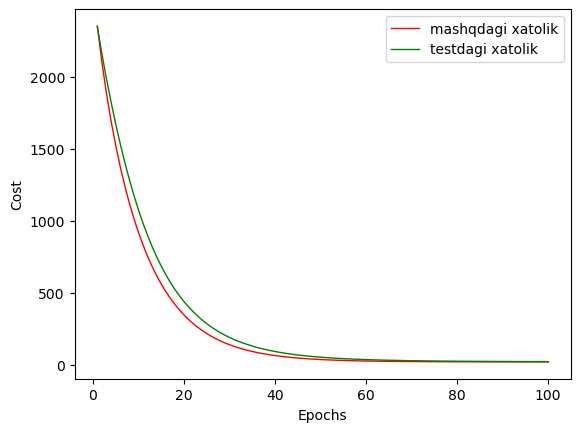

In [23]:
plot_cost(train_costs, test_costs, n_epochs)

In [24]:
m_to_predict = 10

predicted = f_x(X_test[:m_to_predict, :], A)

for i in range(m_to_predict):
    print(f'bashorat: {predicted[i][0]}, haqiqiy: {Y_test[i][0]}')

bashorat: 71.032990586344, haqiqiy: 75.0
bashorat: 71.9606585490414, haqiqiy: 73.0
bashorat: 67.24592818250888, haqiqiy: 72.0
bashorat: 58.345234655811666, haqiqiy: 62.0
bashorat: 63.760059774555444, haqiqiy: 67.0
bashorat: 84.10104297857698, haqiqiy: 81.0
bashorat: 54.613281992735224, haqiqiy: 63.0
bashorat: 52.17486998494772, haqiqiy: 69.0
bashorat: 78.5361923332167, haqiqiy: 80.0
bashorat: 49.066733885085696, haqiqiy: 43.0
